In [1]:

import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

### Processing train dataset

In [2]:
# To avoid overfitting we will apply data preprocessing on train and test dataset,
# but we will not apply same transformation as train on test dataset.

train_datagen = ImageDataGenerator(
        rescale=1./255,         # rescaling values of image array between 0 and 1
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        '../input/cat-and-dog/training_set/training_set',           # directory path to your dataset
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.


### Processing test dataset

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

testing_set = test_datagen.flow_from_directory(
        '../input/cat-and-dog/test_set/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


# Building the CNN

## Initilizing the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### 1. Adding CNN2D layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### 2. Pooling - Maxpooling : It will get(pool) the maximum value from the matrix

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(
                                pool_size = (2, 2),   # This will decide the size of your matrix
                                strides = 2           # This will decide how much columns we will shift in each iteration
                                ))

### 3. Adding second CNN layer
- while adding second CNN layer we need to add pooling with it and we will have to remove input_shape parameter

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

### 4. Flattening
- we will convert our 2D image into 1D using flattening method

In [8]:
cnn.add(tf.keras.layers.Flatten())

### 5. Full connection of CNN

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### 6. Output layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the CNN

### 1. Compiling the CNNinput_shape

In [11]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 2. Training the CNN

In [19]:
%time model = cnn.fit(x=training_set, validation_data = testing_set, epochs=10)

Epoch 1/10
251/251 [==============================] - 36s 142ms/step - loss: 0.4093 - accuracy: 0.8100 - val_loss: 0.4755 - val_accuracy: 0.7988
Epoch 2/10
251/251 [==============================] - 35s 141ms/step - loss: 0.3927 - accuracy: 0.8145 - val_loss: 0.4701 - val_accuracy: 0.7919
Epoch 3/10
251/251 [==============================] - 35s 139ms/step - loss: 0.3762 - accuracy: 0.8312 - val_loss: 0.4892 - val_accuracy: 0.7899
Epoch 4/10
251/251 [==============================] - 35s 139ms/step - loss: 0.3658 - accuracy: 0.8331 - val_loss: 0.4854 - val_accuracy: 0.7909
Epoch 5/10
251/251 [==============================] - 35s 140ms/step - loss: 0.3522 - accuracy: 0.8441 - val_loss: 0.4902 - val_accuracy: 0.7968
Epoch 6/10
251/251 [==============================] - 35s 139ms/step - loss: 0.3310 - accuracy: 0.8551 - val_loss: 0.4892 - val_accuracy: 0.7879
Epoch 7/10
251/251 [==============================] - 35s 141ms/step - loss: 0.3214 - accuracy: 0.8580 - val_loss: 0.4752 - val_ac

## Prediction on single image

In [20]:
from keras.preprocessing import image
test_image = image.load_img('../input/cat-and-dog/training_set/training_set/cats/cat.1001.jpg', target_size = (64, 64))   # Size of the prediction image has to be the same as the training image
test_image = image.img_to_array(test_image)      # Converting image into vector

# In preprocessing phase we added batch size to the training dataset, that means it accepts the value in batch so we will need to convert into the batch dimenssion.
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

# We are getting the index of each category
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print(prediction)

Cat


In [17]:
import matplotlib.pyplot as plt

### Observing the accuracy of the model

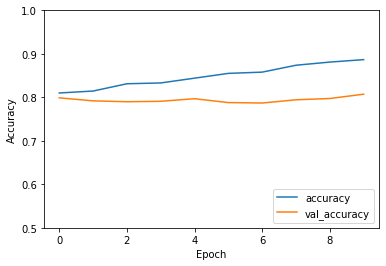

In [24]:
plt.plot(model.history['accuracy'], label='accuracy')
plt.plot(model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')